### Importing Packages

In [1]:
# For heaps.
import heapq

# Importing matplotlib for graphing.
from matplotlib.pylab import plt
%matplotlib inline

# Importing time for measuring running time. 
import time

### Inputs

In [2]:
# Input 1 = [name, cooking time, weight]
# Input 2 = available cooking time. 

dishes_original = ["Roasted Pork/Flæsesteg", 
         "White Potatoes/Kartofler", 
         "Sugar Browned Potatoes/Brunede Kartofler", 
         "Duck/Andesteg", 
         "Red Cabbage/Rødkålssalat",
         "Rice Dessert with Almonds/Risalamande",
         "Reheating and preparing the table"]

# [dish id, step id, [task, [dependencies], time (min), cook required, materials]]
steps_original = [[0, 0, ["Prepare the roast", [], 15, False, "cutting_board"]],
        [0, 1, ["Cook the roast in the oven", [0], 100, True, "oven"]],
        [0, 2, ["FINAL: Take the roast out of the oven and cut it", [0, 1], 15, False, "cutting_board"]],
        [1, 3, ["Wash the white potatoes", [], 3, False, "sink"]],
        [1, 4, ["Peel the white potatoes", [3], 20, False, "cutting_board"]],
        [1, 5, ["FINAL: Boil the white potatoes and put them in a dish", [3, 4], 30, True, "stove"]],
        [2, 6, ["Clean potatoes for browned potatoes", [], 5, False, "sink"]],
        [2, 7, ["Boil the potatoes for browned potatoes", [6], 30, True, "stove"]],
        [2, 8, ["Peel the potatoes for browned potatoes", [6, 7], 20, False, "cutting_board"]],
        [2, 9, ["FINAL: Make sugar-coating for the browned potatoes, fry them in it and put them in a dish", [6, 7, 8], 20, False, "stove"]],
        [3, 10, ["Prepare the duck", [], 15, False, "cutting_board"]],
        [3, 11, ["Prepare apple and vegetables mix for the duck", [], 15, False, "cutting_board"]],
        [3, 12, ["Cook the duck in the oven", [10, 11], 210, True, "oven"]],
        [3, 13, ["FINAL: Cut the duck and put it in a dish together with the filling", [10, 11, 12], 15, False, "cutting_board"]],
        [4, 14, ["FINAL: Cut the cabbage and oranges and mix it with nuts and spices", [], 30, False, "cutting_board"]],
        [5, 15, ["Cook risengrød (porridge rice with milk)", [], 60, True, "stove"]],
        [5, 16, ["Prepare the almonds by removing their skin and chopping them", [], 20, False, "cutting_board"]],
        [5, 17, ["Whip the cream and mix it with almonds and risengrød", [15, 16], 15, False, "pot_pan"]],
        [5, 18, ["FINAL: Heat the cherry sauce", [15, 16, 17], 5, True, "stove"]],
        [6, 19, ["Reheating if necessary and place final dishes on the table", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 15, False, "oven"]]]

# [dish id, step id, [task, [dependencies], time (min), cook required, materials]]
steps_mixed = [[0, 0, ["Prepare the roast", [], 15, True, "cutting_board"]],
        [0, 1, ["Cook the roast in the oven", [0], 100, False, "oven"]],
        [2, 6, ["Clean potatoes for browned potatoes", [], 5, True, "sink"]],
        [0, 2, ["FINAL: Take the roast out of the oven and cut it", [0, 1], 15, True, "cutting_board"]],
        [1, 3, ["Wash the white potatoes", [], 3, True, "sink"]],
        [5, 17, ["Whip the cream and mix it with almonds and risengrød", [15, 16], 15, True, "pot_pan"]],
        [5, 18, ["FINAL: Heat the cherry sauce", [15, 16, 17], 5, False, "stove"]],
        [1, 4, ["Peel the white potatoes", [3], 20, True, "cutting_board"]],
        [1, 5, ["FINAL: Boil the white potatoes and put them in a dish", [3, 4], 30, False, "stove"]],
        [2, 7, ["Boil the potatoes for browned potatoes", [6], 30, False, "stove"]],
        [2, 8, ["Peel the potatoes for browned potatoes", [6, 7], 20, True, "cutting_board"]],
        [3, 11, ["Prepare apple and vegetables mix for the duck", [], 15, True, "cutting_board"]],
        [3, 12, ["Cook the duck in the oven", [10, 11], 210, False, "oven"]],
        [3, 13, ["FINAL: Cut the duck and put it in a dish together with the filling", [10, 11, 12], 15, True, "cutting_board"]],
        [4, 14, ["FINAL: Cut the cabbage and oranges and mix it with nuts and spices", [], 30, True, "cutting_board"]],
        [5, 15, ["Cook risengrød (porridge rice with milk)", [], 60, False, "stove"]],
        [2, 9, ["FINAL: Make sugar-coating for the browned potatoes, fry them in it and put them in a dish", [6, 7, 8], 20, True, "stove"]],
        [3, 10, ["Prepare the duck", [], 15, True, "cutting_board"]],
        [5, 16, ["Prepare the almonds by removing their skin and chopping them", [], 20, True, "cutting_board"]],
        [6, 19, ["Reheating if necessary and place final dishes on the table", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 15, True, "oven"]]]



dishes_1 = ["Numbers", 
         "Letters", 
         "ALONE"]

# [dish id, step id, [task, [dependencies], time (min), cook required, materials]]
steps_1 = [[0, 0, ["Step 1", [], 15, False, "cutting_board"]],
        [0, 1, ["Step 2", [0], 30, True, "oven"]],
        [1, 2, ["Step A", [], 5, False, "sink"]],
        [1, 3, ["Step B", [2], 20, False, "cutting_board"]],
        [2, 4, ["Alone", [], 10, False, "cutting_board"]]]


In [3]:
class cooking(object):
    
    def __init__(self, dishes, steps, cooks, cutting_boards, ovens, stoves, sinks, pot_pans, oven_pans):
        
        # Initialize varaibles
        self.dishes = dishes
        self.steps = steps
        self.clean_tools = ["cutting_board", "pot_pan", "oven_pan"]
        self.len = len(steps)
        
        # Determine the dishes to start with.
        self.initial = self.initial_dishes(dishes, steps, cooks)
        
        # Determine the washing time.
        self.washing_time = 2
        
        # Create lists of cooks initialize them as available (0 = available).
        # Create a heap for each cook which will store their tasks yet to be done. 
        self.cooks = cooks
        self.cooks_list = [0] * cooks 
        self.cooks_tasks = [ [] for _ in range(cooks)]
        
        # Initialize time counter.
        self.time = 0
        
        # Create heap for the other tasks (excluding the pre-assigned dishes).
        self.remaining_steps = []
        
        # Create lists materials and initialize them as available (0 = available).
        self.cutting_board = [0] * cutting_boards
        self.oven = [0] * ovens
        self.stove = [0] * stoves
        self.sink = [0] * sinks
        self.pot_pan = [0] * pot_pans
        self.oven_pan = [0] * oven_pans
        
        # Initialize the heap that will store the schedule.
        self.cooking_heap = []
        
        # Initialize a counter which to count how many steps we have finished.
        self.count_steps = 0
        
        # Initialize heap used for checking dependencies.
        self.dependencies = []
    
    def initial_dishes(self, dishes, steps, cooks):
        """Function which finds the starting dishes (corresponding to the number of cooks) by finding the
        dishes with the most multitasking time."""
        
        # Create a list to store the multitasking times. 
        time_list = [0] * len(dishes)

        # Create a list to store the initial dishes.
        initial_dishes = [0] * cooks
        
        # Go through each step.
        for i in range(len(steps)):

            # Check if it is a multitasking step and if yes add the time.
            if steps[i][2][3] == True:
                time_list[steps[i][0]] += steps[i][2][2]
        
        # Find the starting dishes.
        for j in range(cooks):

            # Find the dish with the max multitasking time and its index.
            the_max = max(time_list)
            the_dish = time_list.index(the_max)
            initial_dishes[j] = the_dish
            
            # Set the element equal to -1 to ensure that it is not picked again.
            time_list[the_dish] = -1
        
        # Return the id of the initial dishes as a list.
        return initial_dishes
    
    def dish_assignment(self, initial_dishes):
        """Function which assigns dishes to each cook."""
        
        # Initialize a cook counter to ensure that we assign dishes to different cooks.
        cook_counter = 0
        
        # Adding all steps for a certain disk to the individual cook's heap.
        for i in range(len(initial_dishes)):
            
            # Check if a step belongs to the current initial dish.
            for step in self.steps:
                
                if initial_dishes[i] == step[0]:
                    
                    # If it does we push the step into the current cook's individual queue
                    heapq.heappush(self.cooks_tasks[cook_counter], step)
            
            # Sort the list based on dependencies.
            self.cooks_tasks[cook_counter].sort(key = lambda x: len(x[2][1]))
            
            # Increase the cook counter by one to move to the next cook. 
            cook_counter += 1 
    
    def remaining_step_assigner(self, initial_dishes):
        """Function which creates a heap that contains the rest of the dishes."""
        
        # We go through all steps.
        for step in self.steps:
            
            # Checking if the step is remaining. If it is, we push it into the remaining step heap.
            if step[0] not in initial_dishes:
                heapq.heappush(self.remaining_steps, step)
        
        # Sort the list based on dependencies.
        self.remaining_steps.sort(key = lambda x: len(x[2][1]))
    
    def available_checker(self, equipment):
        """Function which checks if an equipment is available."""
        
        # Find the appropriate equipment list with the get attribute function.
        equipment_list = getattr(self, equipment)
        
        # Check if the equipment is available.
        if 0 in equipment_list:
            
            # If applicable, check if pot_pan or oven_pan is available.
            if equipment == "oven":
                
                # Recursively find the availability of the oven_pan.
                return self.available_checker("oven_pan")
            
            elif equipment == "stove":
                
                # Recursively find the availability of the pot_pan.
                return self.available_checker("pot_pan")

            # Return the status, index of the available equipment, and the equipment name.
            return [0, equipment_list.index(0), equipment]
        
        # Check if the equipment needs to be washed.
        elif 2 in equipment_list:

            # Return the status, index of the available equipment, and the equipment name.
            return [2, equipment_list.index(2), equipment]
        
        # Check if the equipment is unavailable. 
        elif 1 in equipment_list:
            
            # Return the status and None since we cannot use the equipment right now.
            return [1]
    
    def dependency_checker(self, step):
        """Function which checks if dependencies have been satisfied. Returns True if yes 
        and False if not."""
        
        # We check if the step ID is in the dependency list.
        
        # See if it has no dependencies.
        if len(step[2][1]) == 0:
            return True
        
        # See if the dependencies have been satiesfied by looking at the dependency list.
        for dep in step[2][1]:
            
            # If not we return false.
            if dep not in self.dependencies:
                return False
            
        return True
    
    def status(self, equipment, initial, end_main, end_sec):
        "Function which can be used to change the status of an equipment."
        
        # Find the appropriate equipment list.
        equipment_list = getattr(self, equipment)
        
        # Check if an oven or stove is needed as we then also have to update oven_pan or pot_pan.
        if equipment == "oven":

            # Set the equipment to unavailable.
            avail_index = equipment_list.index(initial)
            equipment_list[avail_index] = end_main

            # Set an oven pan as unavailable.
            op_index = self.oven_pan.index(initial)
            self.oven_pan[op_index] = end_sec

        elif equipment == "stove":

            # Set the equipment to unavailable.
            avail_index = equipment_list.index(initial)
            equipment_list[avail_index] = end_main

            # Set a pot_pan as unavailable.
            pp_index = self.pot_pan.index(initial)
            self.pot_pan[pp_index] = end_sec
        
        elif equipment == "cutting_board":
            
            # Set it as dirty.
            cb_index = self.cutting_board.index(initial)
            self.cutting_board[cb_index] = end_sec

        else:
            # Set the equipment to unavailable.
            avail_index = equipment_list.index(initial)
            equipment_list[avail_index] = end_main
            
    def push_step(self, start_time, step_time, cook, text):
        """Function which pushes a task into the heap."""
        
        #heapq.heappush(self.cooking_heap, ("Start: %s - End: %s" % (start_time, step_time), "Cook: %s" % (cook), text))
        heapq.heappush(self.cooking_heap, (start_time, step_time, "Cook: %s" % (cook), text))
    

    def step_checker_cook(self):
        """Function which checks a cook's own list and outputs what can be done."""
        
        # Find the cook's index.
        avail_cook_index = self.cooks_list.index(0)

        # If no tasks left.
        if len(self.cooks_tasks[avail_cook_index]) == 0:
            return ["wait", avail_cook_index]
        
        # Check each task.
        for i in range(len(self.cooks_tasks[avail_cook_index])):
        
            # First step.
            first_step = self.cooks_tasks[avail_cook_index][i]

            # Check dependencies
            dep = self.dependency_checker(first_step)

            # Check material status
            neccessary_equipment = first_step[2][4]
            equip_status = self.available_checker(neccessary_equipment)

            # We can execute it, we delete it from the heap and return 0.
            if dep == True and equip_status[0] == 0:

                del self.cooks_tasks[avail_cook_index][i]
                
                return [0, avail_cook_index, first_step]

            # When we can wash.
            elif equip_status[0] == 2:
                
                return ["wash", avail_cook_index, equip_status[1], equip_status[2]]
                            
        return ["wait", avail_cook_index]
    
    def step_checker_rem(self):
        """Function which checks the remaining task list and outputs what can be done."""
        
        # Find the cook's index.
        avail_cook_index = self.cooks_list.index(0)
        
        # Check the availability of the sink.
        avail_sink = self.available_checker("sink")

        # If no tasks left.
        if len(self.remaining_steps) == 0:
            
            # Check if we can wash.
            if avail_sink[0] == 0:
                
                # Go through the equipment.
                for the_equipment in self.clean_tools:

                    # Check if it is available.
                    avail = self.available_checker(the_equipment)

                    # If it is available, we wash it.
                    if avail[0] == 2:
                        return ["wash", avail_cook_index, avail[1], avail[2]]

                    # If nothing can be done.
                    else:
                        return ["wait", avail_cook_index]
                    
            # Otherwise, we wait.
            else:
                return ["wait", avail_cook_index]
        
        # Check each step.
        for i in range(len(self.remaining_steps)):
        
            # First step.
            first_step = self.remaining_steps[i]

            # Check dependencies
            dep = self.dependency_checker(first_step)

            # Check material status
            neccessary_equipment = first_step[2][4]
            equip_status = self.available_checker(neccessary_equipment)

            # We can execute it.
            if dep == True and equip_status[0] == 0:

                del self.remaining_steps[i]
                
                return [0, avail_cook_index, first_step]

            # We can wash.
            elif equip_status[0] == 2:
                
                return ["wash", avail_cook_index, equip_status[1], equip_status[2]]
        
        # If the sink is available.
        if avail_sink == 0:
                
                # Go through the equipment.
                for the_equipment in self.clean_tools:

                    # Check if it is available.
                    avail = self.available_checker(the_equipment)

                    # If it is available, we wash it.
                    if avail[0] == 2:
                        return ["wash", avail_cook_index, avail[1], avail[2]]

                    # If nothing can be done.
                    else:
                        return ["wait", avail_cook_index]
        # We wait.
        else:
            return ["wait", avail_cook_index]    
    
    
    def scheduler(self):
        """The main function which creates the cooking schedule."""
        
        # Assign the initial dishes based on multitasking length.
        self.dish_assignment(self.initial)
        
        # Create a list with the rest of the dishes. Heapified based on the number of dependencies.
        self.remaining_step_assigner(self.initial)
        
        # Creating a list for the multitasking tasks.
        mt = []
        
        # Creating a list for the task currently being executed.
        ce = [[None]] * self.cooks
        
        # Scheduling until we have scheduled all steps.
        while len(self.dependencies) != self.len: 

            # We do not check tasks at the beginning.
            if self.time != 0:
                
                # If there are multi-tasking tasks.
                if len(mt) != 0:
                    
                    # We look at all current mt tasks.
                    for i, task in enumerate(mt):

                        # If a task is done, we push it into the main heap.
                        if task[2][2] == 1:
                            
                            # Push to main heap.
                            self.push_step(task[2][5], self.time, None, task[2][0])

                            # Incrementing the cooking step counter.
                            self.count_steps += 1

                            # Update the equipment.
                            self.status(task[2][4], 1, 0, 2)
                            
                            # Dependency list update.
                            self.dependencies.append(task[1])
                            
                            # Update MT list.
                            del mt[i]

                        # Otherwise, we subtract a minute from the task.
                        else:
                            task[2][2] -= 1

                # We check all cooks' tasks.
                for cook, task in enumerate(ce):

                    if task[0] != None:

                        # If a task is done, we push it into the main heap and set the cook as available.
                        if task[2][2] == 1:
                            
                            if task[2][0] == "wash":

                                self.push_step(self.time - self.washing_time, self.time, cook, "Wash: %s" % (task[2][4]))
                                
                                # Update the equipment and sink to available.
                                self.status(task[2][4], 1, 0, 0)
                                self.status("sink", 1, 0, 0)
                                
                                # Set the cook as available.
                                self.cooks_list[cook] = 0
                                
                                # Change the ce list.
                                ce[cook] = [None]

                            # Otherwise, it is a cooking step.
                            else:
                                self.push_step(task[2][5], self.time, cook, task[2][0])
                                
                                # Dependency list update.
                                self.dependencies.append(task[1])

                                # Incrementing the cooking step counter.
                                self.count_steps += 1
                                
                                # Update the equipment.
                                self.status(task[2][4], 1, 0, 2)
                                
                                # Set the cook as available.
                                self.cooks_list[cook] = 0

                                # Change the ce list.
                                ce[cook] = [None]
                                
                        else:
                            # Otherwise, we subtract a minute from the task.

                            task[2][2] -= 1
            
            # Initialize a wait variable.
            wait = False

            # Keep checking if a cook is available.
            while 0 in self.cooks_list and wait == False:
                
                # Find the index of the cook.
                stop = False
                cook_index = self.cooks_list.index(0)
                
                # Switch if one has an empty list.
                if len(self.cooks_tasks[cook_index]) == 0:
                    
                    if cook_index == 0:
                        
                        if self.cooks_list[1] == 1:
                            cook_index = 0
                        
                        else:
                            cook_index = 1
                    
                    elif cook_index == 1:
                        
                        if self.cooks_list[0] == 1:
                            cook_index = 1
                        
                        else:
                            cook_index = 0
                
                # Find the to do.
                to_do_cook = self.step_checker_cook()
                
                # For cook's own list.
                while to_do_cook[0] == 0 and stop == False:
                    
                    if to_do_cook[2][2][3] == True:
                        
                        # Append the starting time to the task.
                        to_do_cook[2][2].append(self.time)
                        
                        #Append the task to mt list.
                        mt.append(to_do_cook[2])

                        # Update equipment.
                        equipment = to_do_cook[2][2][4]

                        # Change the status of the equipment.
                        self.status(equipment, 0, 1, 1)
                        
                        # Check next task.
                        to_do_cook = self.step_checker_cook()
                    
                    else:
                        
                        # Append the starting time to the task.
                        to_do_cook[2][2].append(self.time)
                        
                        #Append the task to mt list.
                        ce[cook_index] = to_do_cook[2]

                        # Update equipment.
                        equipment = to_do_cook[2][2][4]

                        # Change the status of the equipment.
                        self.status(equipment, 0, 1, 1)
                        
                        # Change the cook status.
                        self.cooks_list[to_do_cook[1]] = 1
                        stop = True
                
                # Check if we can wash.
                if to_do_cook[0] == "wash":
                    stop = True
                    
                    # Check the availability of the sink.
                    avail_sink = self.available_checker("sink")
                    
                    # If the sink is available.
                    if avail_sink[0] == 0:
                        
                        # Wash the equipment.
                        # Schedule
                        ce[cook_index] = ["wash", None, ["wash", [], self.washing_time, None, to_do_cook[3]]]
                        
                        # Set the sink and the equipment unavailable.
                        self.status("sink", 0, 1, 1)
                        self.status(to_do_cook[3], 2, 1, 1)
                        
                        # Wash person UV:
                        self.cooks_list[to_do_cook[1]] = 1
                    
                    # If a sink is not avaiable.
                    else:
                        to_do_cook = ["wait", cook_index]
                
                # When a cook has to wait, we check the remaining task list.
                if to_do_cook[0] == "wait":
                    
                    stop = False
                
                    # See to do.
                    to_do_rem = self.step_checker_rem()
                
                    # For the remaining list list.
                    while to_do_rem[0] == 0 and stop == False:
                    
                        if to_do_rem[2][2][3] == True:

                            # Append the starting time to the task.
                            to_do_rem[2][2].append(self.time)

                            #Append the task to mt list.
                            mt.append(to_do_rem[2])

                            # Update equipment.
                            equipment = to_do_rem[2][2][4]

                            # Change the status of the equipment.
                            self.status(equipment, 0, 1, 1)

                            # Check next task.
                            to_do_rem = self.step_checker_rem()

                        else:

                            # Append the starting time to the task.
                            to_do_rem[2][2].append(self.time)

                            #Append the task to ce list.
                            ce[cook_index] = to_do_rem[2]
                            
                            # Update equipment.
                            equipment = to_do_rem[2][2][4]

                            # Change the status of the equipment.
                            self.status(equipment, 0, 1, 1)
                            
                            # Cook status
                            self.cooks_list[to_do_rem[1]] = 1
                            
                            stop = True 
                
                    # Check if we can wash.
                    if to_do_rem[0] == "wash":

                        # Check the availability of the sink.
                        avail_sink = self.available_checker("sink")

                        # If the sink is available.
                        if avail_sink[0] == 0:

                            # Wash the equipment.
                            # Schedule
                            ce[cook_index] = ["wash", None, ["wash", [], self.washing_time, None, to_do_rem[3]]]

                            # Set the sink and the equipment unavailable.
                            self.status("sink", 0, 1, 1)

                            self.status(to_do_rem[3], 2, 1, 1)
                            
                            #Cook status
                            self.cooks_list[to_do_rem[1]] = 1
                        
                        else:
                            to_do_rem = ["wait", cook_index]
                            
               
                # If both returns wait - the cook will stil be avaiable. 
                # Otherwise, we set him to unavailable.
                if to_do_cook[0] == "wait" and to_do_rem[0] == "wait":

                    wait = True
                
                else:
                    
                    wait = False

            # Go to next minute.
            self.time += 1
        

### Intput

In [4]:
schedule = cooking(dishes_original, steps_mixed, 2, 1, 1, 1, 1, 3, 1)
schedule.scheduler()
final = schedule.cooking_heap

### Sorting and Output

In [5]:
# List for the final output.
final_sorted = []

for i in range(len(final)):
    #Sorting the output
    
    task = heapq.heappop(final)
    final_sorted.append(task)

for task in final_sorted:
    print(task)

(0, 5, 'Cook: None', 'Clean potatoes for browned potatoes')
(0, 16, 'Cook: None', 'Prepare the roast')
(0, 60, 'Cook: 0', 'Cook risengrød (porridge rice with milk)')
(5, 8, 'Cook: None', 'Wash the white potatoes')
(16, 18, 'Cook: 1', 'Wash: cutting_board')
(18, 33, 'Cook: None', 'Prepare the duck')
(18, 118, 'Cook: 1', 'Cook the roast in the oven')
(60, 90, 'Cook: 0', 'Boil the potatoes for browned potatoes')
(90, 92, 'Cook: 0', 'Wash: cutting_board')
(92, 112, 'Cook: None', 'Peel the potatoes for browned potatoes')
(112, 114, 'Cook: 0', 'Wash: cutting_board')
(112, 132, 'Cook: None', 'FINAL: Make sugar-coating for the browned potatoes, fry them in it and put them in a dish')
(114, 116, 'Cook: 0', 'Wash: pot_pan')
(114, 145, 'Cook: None', 'FINAL: Cut the cabbage and oranges and mix it with nuts and spices')
(118, 120, 'Cook: 1', 'Wash: oven_pan')
(145, 147, 'Cook: 1', 'Wash: cutting_board')
(147, 162, 'Cook: None', 'Prepare apple and vegetables mix for the duck')
(162, 372, 'Cook: 1', 

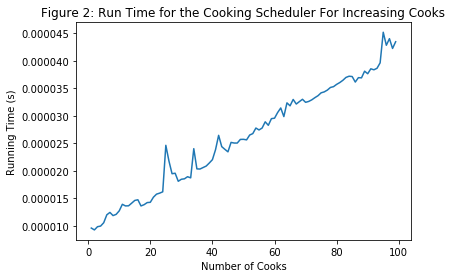

In [6]:
# Creating list for the input size (x-axis).
input_size_list = []

# Creating lists for end times.
time_list = []

# Number of runs.
run_number = 300

# Creating lists of different lengths.
for input_size in range(1, 100, 1):
    
    # Appending the len of the current list to the input list to keep track of the input size.
    input_size_list.append(input_size)
    
    # Creating list for the running times for each algorithm.
    running_time = []
    
    # Running the for loop the specified number of times.
    for i in range(run_number):
        
        #Measuring the time.
        start_time = time.time()
        cooking(dishes_original, steps_mixed, input_size, 1, 1, 1, 1, 3, 1)
        end_time = time.time()
        running_time.append(end_time - start_time)

    # Finding the average run times and appending them to the corresponding lists.
    average = sum(running_time) / len(running_time)
    time_list.append(average)

# Plotting the input size and running times. 
plot_1 = plt.figure(1)
plt.plot(input_size_list, time_list)
plt.title("Figure 2: Run Time for the Cooking Scheduler For Increasing Cooks")
plt.xlabel("Number of Cooks")
plt.ylabel("Running Time (s)")
#plt.legend(['Selection Sort', 'Three-Way Merge Sort'])
plt.show()